In [11]:
import pandas as pd
import folium
import geopandas
from geodatasets import get_path
import matplotlib
import contextily as cx
from shapely.geometry import LineString

In [2]:
feu_galveston = pd.read_csv("../data/FUE_Galveston.csv")
feu_galveston.head()
# you'll see that we're given latitude and longitude coordinates for each location in Galveston.

,Name,Weekly_Dropoff_Totes,Daily_Pickup_Totes,Address,Latitude,Longitude
0,Moody Gardens,0.0,0.0,"1 Hope Blvd, Galveston",29.2736,-94.8523
1,Sugar Bean,1.0,1.0,"11 Evia Main, Galveston",29.2610,-94.8704
2,MAC-IES,1.0,1.0,"1110 23rd Street, Galveston",29.2989,-94.7914
3,Good Dough,1.0,1.0,"1508 39th Street, Galveston",29.2906,-94.8085
4,Porch Cafe,1.0,1.0,"1625 East Beach Drive #2A, Galveston",29.3196,-94.7502


In [3]:
# How-to map lat and long points using geopandas: https://geopandas.org/en/latest/gallery/create_geopandas_from_pandas.html
# How-to map lat and long points using folium: https://georgetsilva.github.io/posts/mapping-points-with-folium/

# Map each point using folium
# make a list of every feu location point 
locations_df = feu_galveston[['Latitude', 'Longitude']]
locations_list = locations_df.values.tolist()
# I obtained latitude and longitude coordinates of Galvenston center at https://latitude.to/map/us/united-states/cities/galveston
galveston_map = folium.Map(location = [29.30135, -94.7977], tiles ='OpenStreetMap', zoom_start=11)
for point in range(0, len(locations_list)):
    folium.Marker(locations_list[point], popup=feu_galveston['Name'][point]).add_to(galveston_map)

# to add a route line between points in a list, use the following code 
# folium.PolyLine(list_of_lat_long_points_on_route).add_to(galveston_map) 
# source: https://deparkes.co.uk/2016/06/03/plot-lines-in-folium/

galveston_map


# Geopandas

In [4]:
gdf = geopandas.GeoDataFrame(
    feu_galveston, geometry=geopandas.points_from_xy(feu_galveston.Longitude, feu_galveston.Latitude), crs="EPSG:4326"
)
gdf.head()

,Name,Weekly_Dropoff_Totes,Daily_Pickup_Totes,Address,Latitude,Longitude,geometry
0,Moody Gardens,0.0,0.0,"1 Hope Blvd, Galveston",29.2736,-94.8523,POINT (-94.85230 29.27360)
1,Sugar Bean,1.0,1.0,"11 Evia Main, Galveston",29.2610,-94.8704,POINT (-94.87040 29.26100)
2,MAC-IES,1.0,1.0,"1110 23rd Street, Galveston",29.2989,-94.7914,POINT (-94.79140 29.29890)
3,Good Dough,1.0,1.0,"1508 39th Street, Galveston",29.2906,-94.8085,POINT (-94.80850 29.29060)
4,Porch Cafe,1.0,1.0,"1625 East Beach Drive #2A, Galveston",29.3196,-94.7502,POINT (-94.75020 29.31960)


<Axes: >

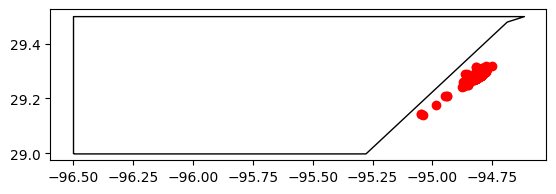

In [5]:
world = geopandas.read_file(get_path("naturalearth.land"))

# Restricting to Texas
ax = world.clip([-96.5, 29, -94, 29.5]).plot(color="white", edgecolor="black")

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color="red")

In [6]:
gdf_worldmap = gdf.to_crs(epsg=3857)

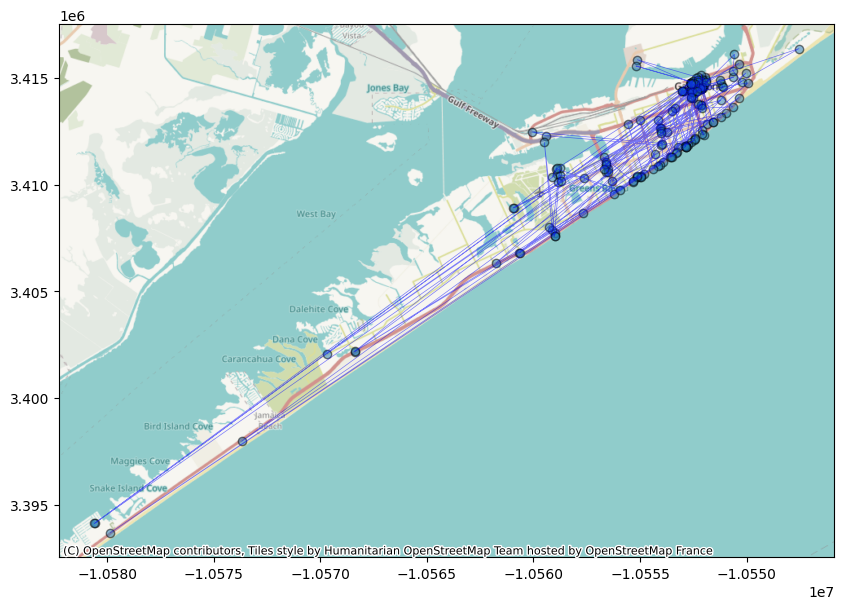

In [18]:
ax = gdf_worldmap.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
route = LineString(gdf_worldmap.geometry.tolist())

# Create a GeoDataFrame with the route LineString
gdf_route = geopandas.GeoDataFrame(geometry=[route])
gdf_route.plot(ax=ax, color='blue', linewidth=0.5, alpha = 0.5)
cx.add_basemap(ax)